### Red Wine Quality Prediction Project
Project Description:

The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).


This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

#### Attribute Information

Input variables (based on physicochemical tests):

1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

Output variable (based on sensory data):

12 - quality (score between 0 and 10)

What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'. This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value. You need to build a classification model. 

#### Inspiration
Use machine learning to determine which physiochemical properties make a wine 'good'!

Dataset Link-
https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Red%20Wine/winequality-red.csv


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Red%20Wine/winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


The dataset contains the details of wines with numeric and categorical values classifying the difference between each ones, we need to rate the wines from 0-10 depending on their quality

In [3]:
df.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [4]:
df.tail(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1579,6.2,0.560,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5
1580,7.4,0.350,0.33,2.4,0.068,9.0,26.0,0.99470,3.36,0.60,11.9,6
1581,6.2,0.560,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5
1582,6.1,0.715,0.10,2.6,0.053,13.0,27.0,0.99362,3.57,0.50,11.9,5
1583,6.2,0.460,0.29,2.1,0.074,32.0,98.0,0.99578,3.33,0.62,9.8,5
1584,6.7,0.320,0.44,2.4,0.061,24.0,34.0,0.99484,3.29,0.80,11.6,7
1585,7.2,0.390,0.44,2.6,0.066,22.0,48.0,0.99494,3.30,0.84,11.5,6
1586,7.5,0.310,0.41,2.4,0.065,34.0,60.0,0.99492,3.34,0.85,11.4,6
1587,5.8,0.610,0.11,1.8,0.066,18.0,28.0,0.99483,3.55,0.66,10.9,6
1588,7.2,0.660,0.33,2.5,0.068,34.0,102.0,0.99414,3.27,0.78,12.8,6


In [5]:
#exploring data shape
df.shape

(1599, 12)

In [6]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
df.columns.tolist()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [8]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [9]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
df.isnull().sum().sum()

0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [12]:
# number of unique values for quality in dataset
df['quality'].nunique()

6

In [13]:
# mean density of the wine dataset
df['density'].mean()

0.9967466791744841

In [14]:
df.head

<bound method NDFrame.head of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067  

In [15]:
# append dataframes
wine_df = df.append

# view dataframe to check for success
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


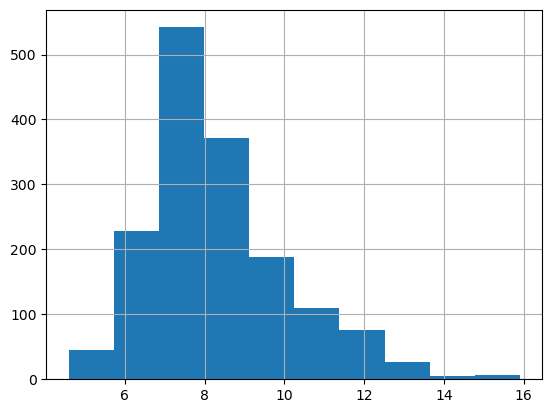

In [16]:
# Fixed Acidity
df['fixed acidity'].hist();

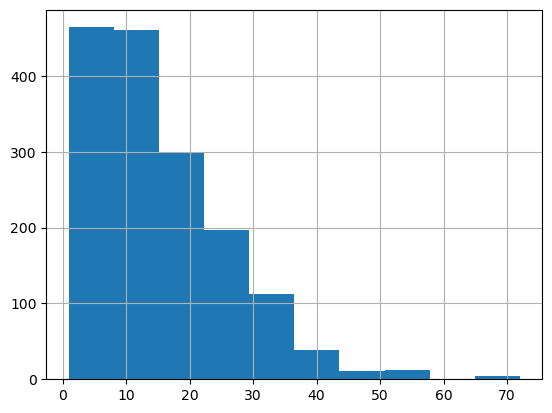

In [17]:
# Total Sulfur Dioxide
df['free sulfur dioxide'].hist();

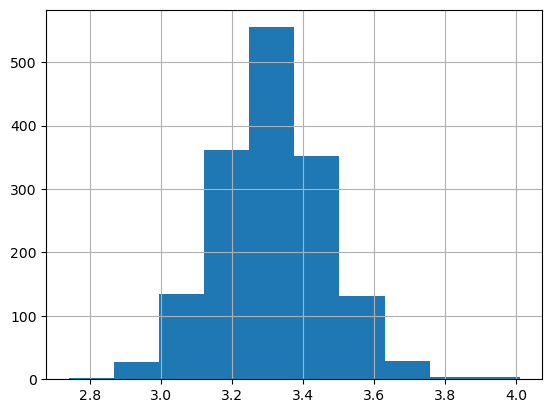

In [18]:
# pH
df['pH'].hist();

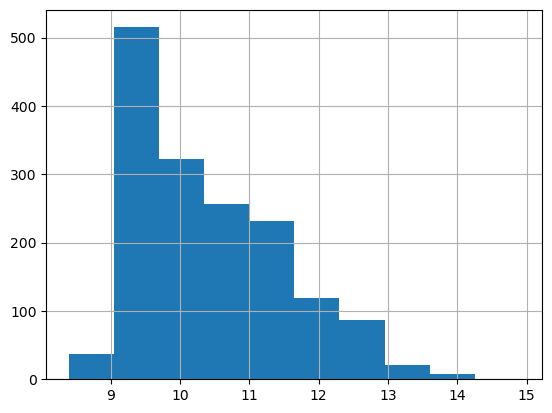

In [19]:
# Alcohol
df['alcohol'].hist();

The histograms shows that Fixed Acidity and Alcohol feature variables appear skewed to the right, it means that there are some outliers on the right side of the distribution. This will drag the mean/average up, so that it will be less representative of the data as a whole).

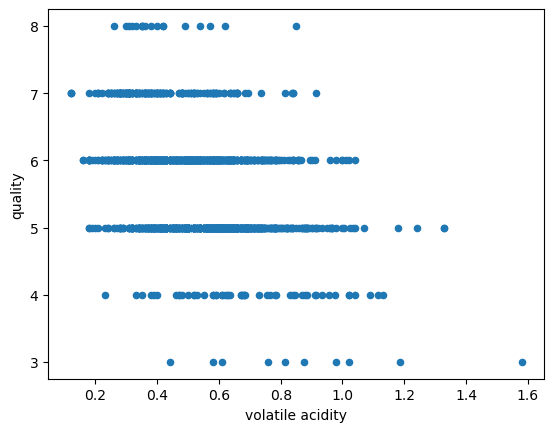

In [20]:
# Volatile Acidity
df.plot(y='quality', x='volatile acidity', kind='scatter');

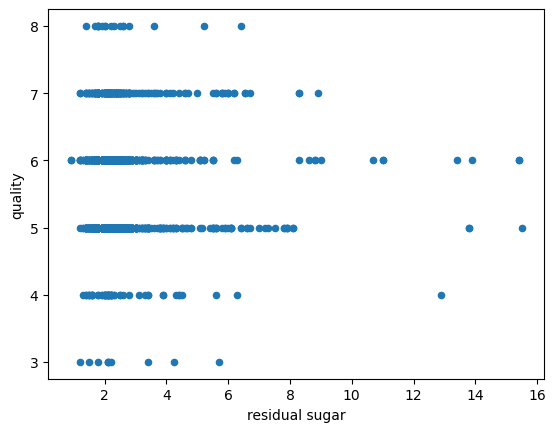

In [21]:
# Residual Sugar
df.plot(y='quality', x='residual sugar', kind='scatter');

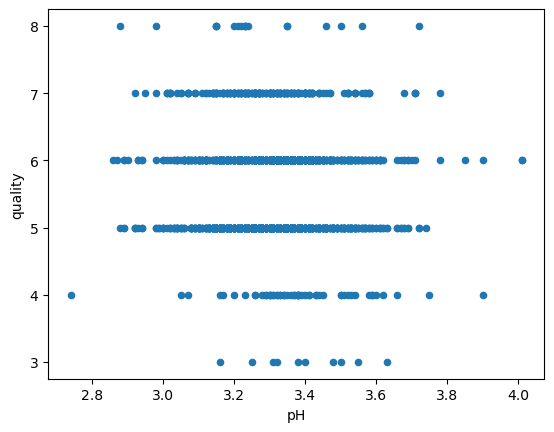

In [22]:
# pH
df.plot(y='quality', x='pH', kind='scatter');

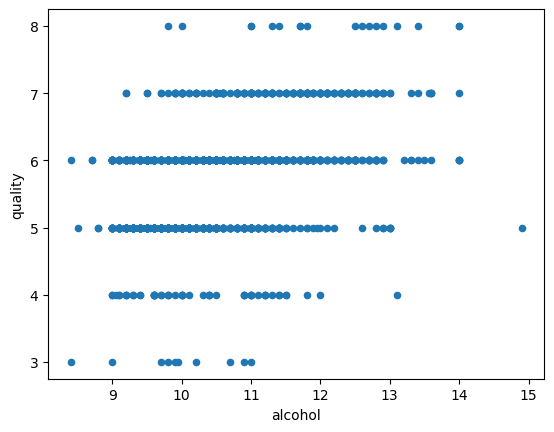

In [23]:
# alcohol
df.plot(y='quality', x='alcohol', kind='scatter');

As per the scatterplots of quality against different feature variables, Alcohol is most likely to have a positive impact on quality.


Since, alcohol has a positve correlation and highest among all the positive correlation scatterplots. The higher the alcohol content, the higher the quality.

We will plot a Heatmap to show the correlation coefficient for the wine's feature variables



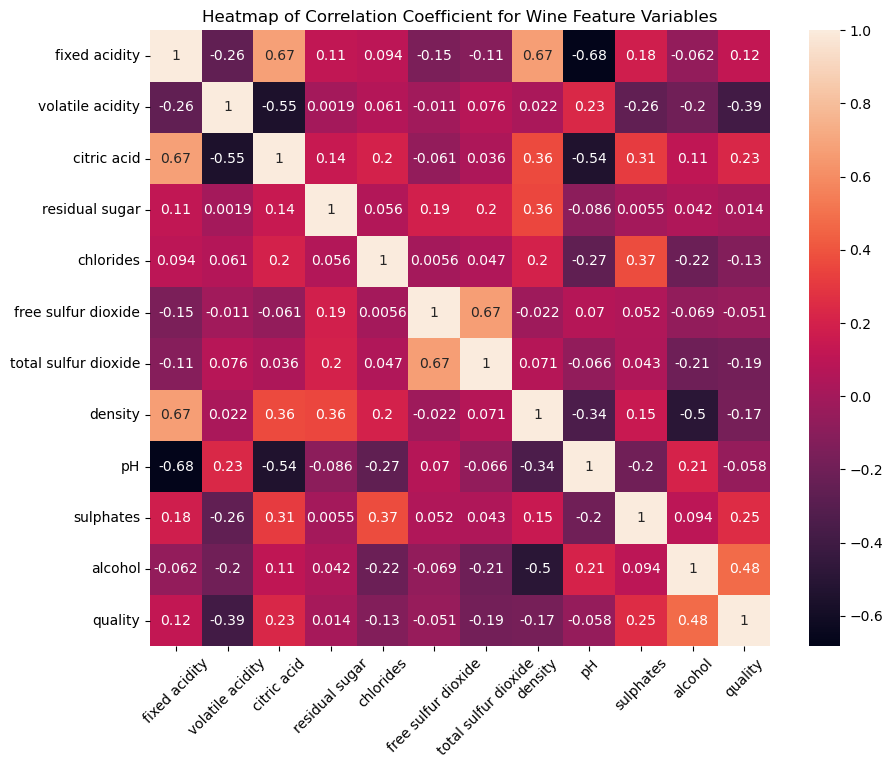

In [24]:
# plot heatmap for feature variables
corr = df.corr()
plt.figure(figsize=[10,8])
sns.heatmap(corr, annot=True)
plt.xticks(rotation=45)
plt.title("Heatmap of Correlation Coefficient for Wine Feature Variables", size=12);

As per the bottom row of Quality, the feature variable with the most positive impact on Quality is Alcohol at 0.44 coefficient. The other features such as Volatile Acidity, Residual Sugar and pH are negatively or less than 0.1 correlated.



We can create categorical variable by creating our own categories using the quantitative variables.

First, we will create a new column called acidity levels with these categories:

Acidity Levels:

High: Lowest 25% of pH values
Moderately High: 25% - 50% of pH values
Medium: 50% - 75% of pH values
Low: 75% - max pH value
Here, the data is being split at the 25th, 50th, and 75th percentile.

After we create these four categories, we will be able to use groupby to get the mean quality rating for each acidity level.

In [25]:
# Check the min, 25%, 50%, 75%, max pH values with Pandas describe
df['pH'].describe()

count    1599.000000
mean        3.311113
std         0.154386
min         2.740000
25%         3.210000
50%         3.310000
75%         3.400000
max         4.010000
Name: pH, dtype: float64

In [26]:
# Bin edges that will be used to "cut" the data into groups which will be filled with the values we just found
bin_edges = [2.72, 3.11, 3.21, 3.32, 4.01]

In [27]:
# Labels for the four acidity level groups with categories
bin_names = ['high','moderately high','medium','low']

In [28]:
# Creating acidity_levels column

df['acidity levels'] = pd.cut(df['pH'], bins=bin_edges, labels=bin_names)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,acidity levels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,moderately high
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,moderately high
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low


In [29]:
# Mean quality of each acidity level with groupby
df.groupby('acidity levels')['quality'].mean()

acidity levels
high               5.692308
moderately high    5.676157
medium             5.670429
low                5.588798
Name: quality, dtype: float64

Wine with low acidity level/ pH receives the highest average rating, followed closely by medium acidity level. We can conclude that the lower the acidity level, the higher the quality of wine.

##### Now, we need to check if wines with high alocohol content received the better ratings?


We will create two groups to analyze the query:
* Low alcohol (samples with an alcohol content less than the median)
* High alcohol (samples with an alcohol content greater than or equal to the median)

In [30]:
# Median amount of alcohol content
df['alcohol'].median()

10.2

In [31]:
# Samples with alcohol content less than the median
low_alcohol = df.query('alcohol < 10.3')

# Samples with alcohol content greater than or equal to the median
high_alcohol = df.query('alcohol >= 10.3')

# Need to ensure these queries included each sample exactly once
num_samples = df.shape[0]
num_samples == low_alcohol['quality'].count() + high_alcohol['quality'].count() 

True

In [32]:
# Mean quality rating for the low alcohol group
low_alcohol['quality'].mean()

5.324228028503563

In [33]:
# Mean quality rating for the high alcohol group
high_alcohol['quality'].mean()

5.982826948480845

Observation:
    
    Wines with higher alcohol content receives better ratings.



##### Now, we will check if wines with sugar received higher rating or not

In [34]:
# rename column
df.rename(columns={'residual sugar':'residual_sugar'}, inplace=True)

In [35]:
#checking if name was changed
df.head()

,fixed acidity,volatile acidity,citric acid,residual_sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,acidity levels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,moderately high
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,moderately high
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low


In [36]:
# Median amount of residual sugar
df['residual_sugar'].median()

2.2

In [37]:
# Samples with residual sugar less than the median
low_sugar = df.query('residual_sugar < 3.0')

# Samples with residual sugar greater than or equal to the median
high_sugar = df.query('residual_sugar >= 3.0')

# ensure these queries included each sample exactly once
num_samples == low_sugar['quality'].count() + high_sugar['quality'].count() 

True

In [38]:
# Obtain mean quality rating for the low sugar group
low_sugar['quality'].mean()

5.638704930095659

In [39]:
# Obtain mean quality rating for the high sugar group
high_sugar['quality'].mean()

5.620833333333334

Sweeter wines with higher sugar content receives higher rating although there is a close match with lower sugar content.

In [40]:
#Use Matplotlib to create bar charts that visualize the conclusions made with groupby and query.

# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
#Create a bar chart with one bar for low alcohol and one bar for high alcohol wine samples.
# Get overall mean and median for alcohol

median = df['alcohol'].median()

# Get subsets for data with < and >= alcohol median
low = df.query('alcohol < {}'.format(median))
high = df.query('alcohol >= {}'.format(median))

# Get mean for quality with low and high alcohol
mean_quality_low_alcohol = low['quality'].mean()
mean_quality_high_alcohol = high['quality'].mean()

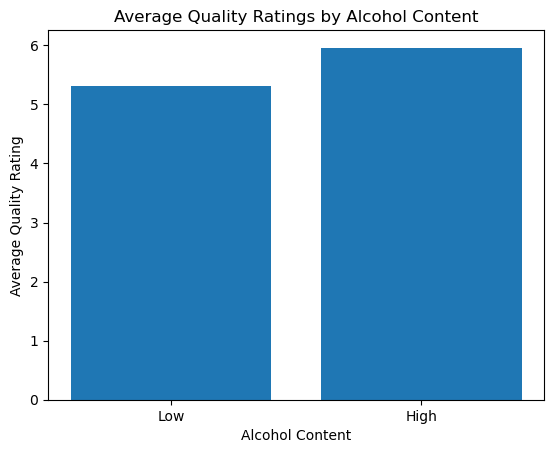

In [42]:
# Bar chart with labels
locations = [1, 2]
heights = [mean_quality_low_alcohol, mean_quality_high_alcohol]
labels = ['Low', 'High']

plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Alcohol Content')
plt.xlabel('Alcohol Content')
plt.ylabel('Average Quality Rating');

As per bar chart, wines with higher alcohol content receives a higher quality rating.

In [43]:
# Use query to select each group and get its mean quality
# Get the mean and median for residual sugar
median = df['residual_sugar'].median()

# Get the subsets for < and >= median
low_sugar = df.query('residual_sugar < {}'.format(median))
high_sugar = df.query('residual_sugar >= {}'.format(median))

# Get the mean for quality
mean_quality_low_sugar = low_sugar['quality'].mean()
mean_quality_high_sugar = high_sugar['quality'].mean()

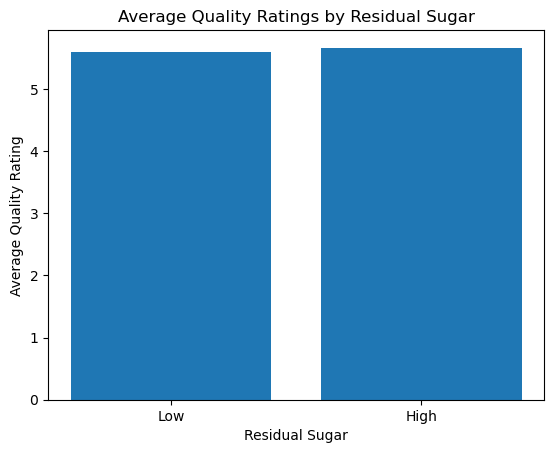

In [44]:
# Create a bar chart with proper labels
locations = [1,2]
heights = [mean_quality_low_sugar, mean_quality_high_sugar]
labels = ['Low', 'High']

plt.bar(locations, heights, tick_label = labels)
plt.title('Average Quality Ratings by Residual Sugar')
plt.xlabel('Residual Sugar')
plt.ylabel('Average Quality Rating');

We can see that residual sugar doesn't make any identical difference.


Now, we will need to assess the acidity level if it contributes to the highest average rating of the wine.

In [45]:
# We will use groupby to get the mean quality for each acidity level
acidity_level_mean = df.groupby('acidity levels')['quality'].mean()
acidity_level_mean

acidity levels
high               5.692308
moderately high    5.676157
medium             5.670429
low                5.588798
Name: quality, dtype: float64

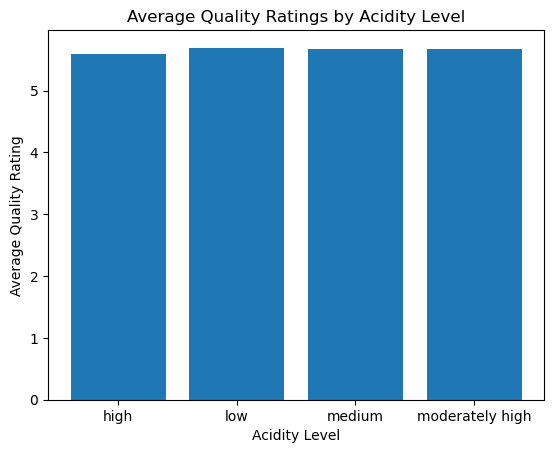

In [46]:
# Now, we will create a bar chart with proper labels to assess further
locations = [2,3,4,1]
heights = acidity_level_mean
labels = ['low','medium','moderately high','high']

plt.bar(locations, heights, tick_label = labels)
plt.title('Average Quality Ratings by Acidity Level')
plt.xlabel('Acidity Level')
plt.ylabel('Average Quality Rating');

As per the bar chart, acidity doesn't impact the quality of wine in an identical manner.


We can use plot function to assess our data further:

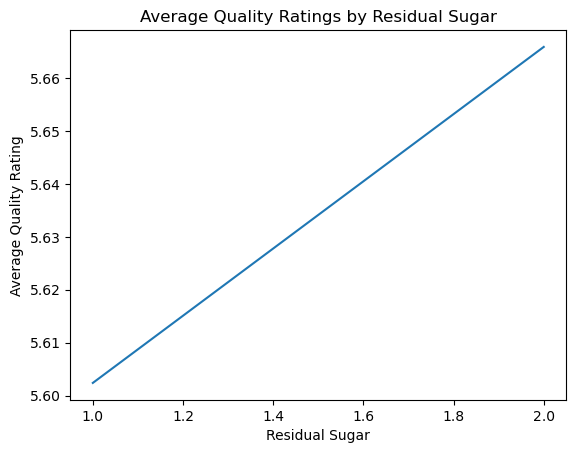

In [47]:
# We will create a line with proper labels
import matplotlib.pyplot as plt
%matplotlib inline
locations = [1,2]
heights = [mean_quality_low_sugar, mean_quality_high_sugar]

plt.plot(locations, heights)
plt.title('Average Quality Ratings by Residual Sugar')
plt.xlabel('Residual Sugar')
plt.ylabel('Average Quality Rating');

As per the plot above, we can see the relationship between the quality rating and residual sugar. This plot shows that the highest residual sugar content infuse to the average quality of the wine.

Now, we will assess the effect of acidity level on the average quality of wine:

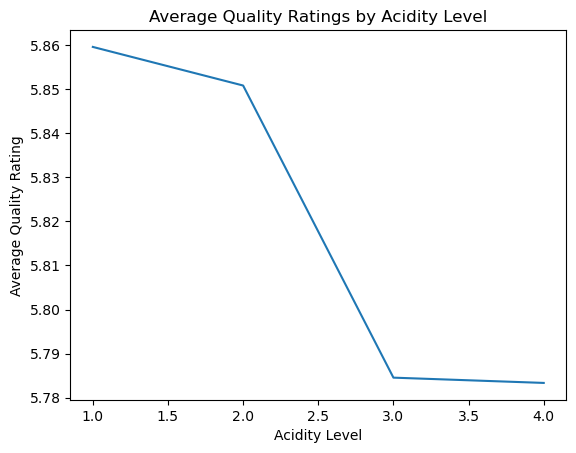

In [48]:
# Create a line chart with proper labels
import matplotlib.pyplot as plt
%matplotlib inline
locations = [1,2,3,4]
heights = [5.859593, 5.850832, 5.784540, 5.783343]

plt.plot(locations, heights)
plt.title('Average Quality Ratings by Acidity Level')
plt.xlabel('Acidity Level')
plt.ylabel('Average Quality Rating');

The plot above shows that the higher acidity level/pH is lowering the quality of wine